# Project 3: Second-Order Systems #
## Tosses ##
By: Mary Fung

In [162]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
from numpy import sin

### Background ###

#### Color Guard ####
The most common piece of equipment in a color guard is the flag. While they can come in a wide variety of styles, sizes, and colors, they all tend to consist of of a colored and/or patterned silk mounted on a weighted pole. The most common and standard color guard flags utilize a 36" x 54" flag generally made from silk, surmounted on a 6' hollow aluminum pole weighted on both ends with 1/2" carriage bolts of differing lengths that are taped in place.

Color guard flags are weighted differently depending on the guard, the performer, and the routine. Weighting a color guard pole helps to combat the drag created by the silk, and certain weights help the flag spin differently which can be preferable depending on what the routine calls for (and if you're doing drum corps or winterguard, but that's besides the point).

One of the simpler and more basic tosses done on flag is called a 4-count toss (also called a one-and-a-half toss or a double). This is a simple vertical toss from the silk where the flag makes a specific amount of rotations in the air (it depends on how you count it) and the catch is made with the silk down.

## Question ##
How does changing the weights on a color guard flag affect a standard toss?

## Model ##
The model begins at the release of the toss. The initial force from the person releasing the pole creates both vertical motion and rotation.
### Schematic Diagram ###
![Diagram of both phases of the Flag toss](diagrams/flag.png)

### Making the System ###
First I need to import the units I might be using and create my initial condiditons.

In [163]:
radian = UNITS.radian
degree = UNITS.degree
m = UNITS.meter
ft = UNITS.feet
s = UNITS.second
kg = UNITS.kilogram
N = UNITS.newton

<Unit('newton')>

In [164]:
def make_system(m1, m2):
    """Makes a System object for the given conditions.
    
    returns: System with init, ...
    """
    P = Vector(0, 1) * m
    V = Vector(0, 8) * m/s
    
    init = State(x=P.x, y=P.y, theta=1.5, 
                 vx=V.x, vy=V.y, omega=-7)

    t_end = 1.75 * s
    
    return System(init=init, t_end=t_end,
                  g = 9.8 * m/s**2,
                  m1=m1 * kg, m2=m2 * kg,
                  mass = m1+m2,
                  length = 6 * ft)

And to test the function:

In [165]:
system = make_system(1, .5)

,values
init,x 0.0 meter y ...
t_end,1.75 second
g,9.8 meter / second ** 2
m1,1 kilogram
m2,0.5 kilogram
mass,1.5
length,6 foot


In [166]:
system.init

,values
x,0.0 meter
y,1.0 meter
theta,1.5
vx,0.0 meter / second
vy,8.0 meter / second
omega,-7


### Equations ###
There are several equations that are used in this model. Most of them are based on the assumption that this is system in which two masses are connected by an ideal, massless rod. Along this rod is a center of mass. The distance from the center of mass can be found using the following equations:

$r1 = (m1*L)/(m1+m2)$

Where r1 is the distance between mass one and the center of mass, L is the total length of the pole, and m1 and m2 represent the individual masses.

From here, r2 can be calculated using the following:

$r2 = L-r1$

With this, the other formulas we need include:

$ T1 = (m1 * g) * r1 * (sin(theta))$

$ T2 = (m2 * g) * r2 * (sin(theta))$

The moment of inertia:

$ I = (m1*m2*L**2)/(m1+m2)$

And lastly:

$ \alpha = (T1+T2)/I$

Inputting the equations into a slope function creates the following:

In [149]:
def slope_func(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object
    
    returns: sequence (vx, vy, omega, ax, ay, alpha)
    """
    x, y, theta, vx, vy, omega = state
    unpack(system)

    ax = 0
    ay = -g
    
    r1=(m2*length)/(m1+m2)
    r2=length-r1
    
    T1 = (m1 * g) * r1 * (sin(theta))
    T2 = (m2 * g) * r2 * (sin(theta))
    I = (m1*m2*length**2)/(m1+m2)
    alpha = (T1 + T2) / I

    return vx, vy, omega, ax, ay, alpha

In [150]:
slope_func(system.init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(8.0, 'meter / second')>,
 -7,
 0,
 <Quantity(-9.8, 'meter / second ** 2')>,
 <Quantity(3.258483622906578, 'meter / foot / second ** 2')>)

From here we can run the system.

In [174]:
results, details = run_ode_solver(system, slope_func, max_step=0.05)
details

,values
sol,None
t_events,[]
nfev,212
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [152]:
results.tail()

,x,y,theta,vx,vy,omega
1.55,0.0,1.62775,-8.774317,0.0,-7.19,-8.220351
1.60,0.0,1.25600,-9.191870,0.0,-7.68,-8.448213
1.65,0.0,0.85975,-9.615504,0.0,-8.17,-8.459455
1.70,0.0,0.43900,-10.034144,0.0,-8.66,-8.251850
1.75,0.0,-0.00625,-10.437691,0.0,-9.15,-7.865344


## Results ##

The following graph shows the position of the center of mass in the x and y directions in regards to time.

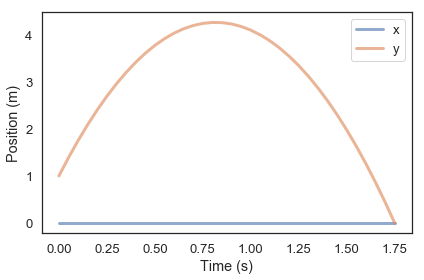

In [175]:
plot(results.x, label='x')
plot(results.y, label='y')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

From here, we can see that the toss does as it should. It goes up in a vertical direction and down with no change in the x orientation.

To plot the change in theta (angle) over time we can use the following:

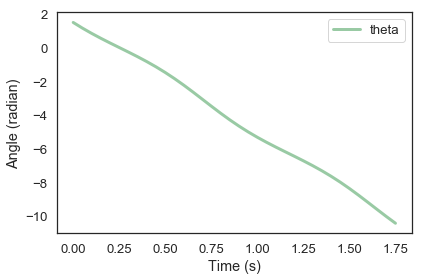

In [176]:
plot(results.theta, label='theta', color='C2')

decorate(xlabel='Time (s)',
         ylabel='Angle (radian)')

This line isn't straight because the difference in weights cause the pole to spin in a non-uniform way.

Velocity can also be graphed:

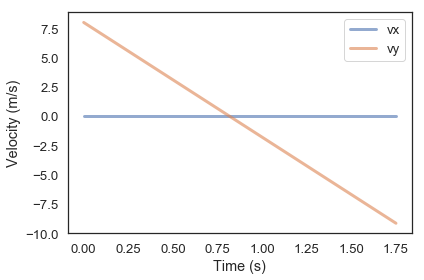

In [177]:
plot(results.vx, label='vx')
plot(results.vy, label='vy')

decorate(xlabel='Time (s)',
         ylabel='Velocity (m/s)')

As expected, the velocity in the vertical direction is positive for the first half of the toss and negative for the second. This shows that the pole goes up, reaches its maximum height and comes back down.

The angular velocity of the pole changes due to its rotation:

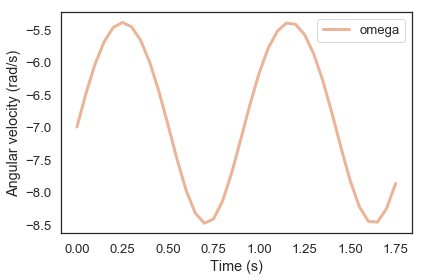

In [178]:
plot(results.omega, label='omega', color='C1')
decorate(xlabel='Time (s)',
         ylabel='Angular velocity (rad/s)')

And lastly, the trajectory of the pole is a simple vertical line:

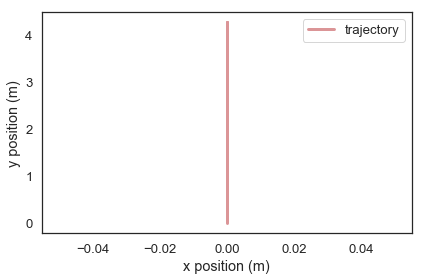

In [156]:
plot(results.x, results.y, label='trajectory', color='C3')

decorate(xlabel='x position (m)',
         ylabel='y position (m)')

### Sweeping Parameters ###
Now that the system is set up, we can attempt to sweep the weights and see the result on the rotation of the pole.

We can use theta to find the final angular orientation of the pole.

In [157]:
get_last_value(results.theta)

-10.43769134159019

In [158]:
def theta_final(results):
    return get_last_value(results.theta)

And now we can create our array:

In [159]:
m1_array = linspace(0,5,21)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ])

In [160]:
for m1 in m1_array:
    toss = make_system(m1,.5)
    results, details = run_ode_solver(system, slope_func, max_step=0.05)
    print(toss.m1, theta_final(results))

0.0 kilogram -10.43769134159019
0.25 kilogram -10.43769134159019
0.5 kilogram -10.43769134159019
0.75 kilogram -10.43769134159019
1.0 kilogram -10.43769134159019
1.25 kilogram -10.43769134159019
1.5 kilogram -10.43769134159019
1.75 kilogram -10.43769134159019
2.0 kilogram -10.43769134159019
2.25 kilogram -10.43769134159019
2.5 kilogram -10.43769134159019
2.75 kilogram -10.43769134159019
3.0 kilogram -10.43769134159019
3.25 kilogram -10.43769134159019
3.5 kilogram -10.43769134159019
3.75 kilogram -10.43769134159019
4.0 kilogram -10.43769134159019
4.25 kilogram -10.43769134159019
4.5 kilogram -10.43769134159019
4.75 kilogram -10.43769134159019
5.0 kilogram -10.43769134159019


And wrap it in a funciton:

In [179]:
def sweep_m1(m1_array):
    sweep = SweepSeries()
    for m1 in m1_array:
        toss = make_system(m1,.5)
        results, details = run_ode_solver(system, slope_func, max_step=0.05)
        sweep[toss.m1] = theta_final(results)
    return sweep

In [180]:
init_m1 = sweep_m1(m1_array)

ValueError: setting an array element with a sequence.

Unfortunately, sweeping the mass doesn't seem to have an effect on theta. This is likely due to an error somewhere in the equations.

## Interpretation ##
While a system was able to be partially modeled. There are large issues with this project. Not getting the code to work was one of them.

Despite this, we can see that the rotation of the pole is uneven, as expected, despite the trajectory being a simple vertical motion.

Further iterations of this model would include fixing and finishing the sweeping of the two masses and potentially sweeping and/or comparing that to the force required to complete a set number of rotations. To do so, I would implement an error function that would stop the simulation after a number of rotations and use that to show difference in time and force required to complete the toss. Additionally, I would add another phase to the model and show the prep into the toss when the force is being applied. The release of the toss would then continue on as it does above, but the initial velocity would be acquired from the results of the first phase.

Overall, this project failed.